In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
train_data_path = "/content/drive/MyDrive/Colab Dataset/DR_New/data/train"
test_data_path = "/content/drive/MyDrive/Colab Dataset/DR_New/data/test"

In [3]:
# Define the batch size and image size
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# Load the training dataset from the specified directory
train_ds = image_dataset_from_directory(
    train_data_path,
    seed=42, # Set a seed for reproducibility
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Load the testing dataset from the specified directory
test_ds = image_dataset_from_directory(
    test_data_path,
    seed=42, # Set a seed for reproducibility
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Display the class names (assuming the same class names in both train and test)
class_names = train_ds.class_names
print(f"Class names: {class_names}")

print(f"Number of training batches: {tf.data.experimental.cardinality(train_ds)}")
print(f"Number of testing batches: {tf.data.experimental.cardinality(test_ds)}")


'''
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

raw_train_ds = image_dataset_from_directory(
    data_path,
    validation_split=0.2, # Use 20% of the data for validation (testing)
    subset="training",
    seed=42, # Set a seed for reproducibility
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

raw_val_ds = image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Display the class names
class_names = raw_train_ds.class_names
print(f"Class names: {class_names}")


train_ds = raw_train_ds
test_ds = raw_val_ds

print(f"Number of training batches: {tf.data.experimental.cardinality(train_ds)}")
print(f"Number of testing batches: {tf.data.experimental.cardinality(test_ds)}")
'''

Found 3229 files belonging to 2 classes.
Found 361 files belonging to 2 classes.
Class names: ['dr', 'normal']
Number of training batches: 101
Number of testing batches: 12


'\nBATCH_SIZE = 32\nIMG_SIZE = (224, 224)\n\nraw_train_ds = image_dataset_from_directory(\n    data_path,\n    validation_split=0.2, # Use 20% of the data for validation (testing)\n    subset="training",\n    seed=42, # Set a seed for reproducibility\n    image_size=IMG_SIZE,\n    batch_size=BATCH_SIZE\n)\n\nraw_val_ds = image_dataset_from_directory(\n    data_path,\n    validation_split=0.2,\n    subset="validation",\n    seed=42,\n    image_size=IMG_SIZE,\n    batch_size=BATCH_SIZE\n)\n\n# Display the class names\nclass_names = raw_train_ds.class_names\nprint(f"Class names: {class_names}")\n\n\ntrain_ds = raw_train_ds\ntest_ds = raw_val_ds\n\nprint(f"Number of training batches: {tf.data.experimental.cardinality(train_ds)}")\nprint(f"Number of testing batches: {tf.data.experimental.cardinality(test_ds)}")\n'

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.models import Model

# Load the VGG16 model with pre-trained weights from ImageNet, including the top classification layer
vgg16_full = VGG16(weights='imagenet', include_top=True, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Remove the last fully connected layer
# We can access the layers by index or name. Assuming the last layer is the prediction layer.
# Let's create a new model that ends at the second to last layer.
vgg16 = Model(inputs=vgg16_full.input, outputs=vgg16_full.layers[-2].output)


# Freeze the layers of the new VGG16 model so they are not trained
for layer in vgg16.layers:
    layer.trainable = False

model = vgg16

# You can optionally print the summary of the new model to verify the layers
# vgg16.summary()

'''
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
from tensorflow.keras.models import Model

# Load the ResNet50 model with pre-trained weights from ImageNet, including the top classification layer
resnet50_full = ResNet50(weights='imagenet', include_top=True, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Remove the last fully connected layer
# We can access the layers by index or name. Assuming the last layer is the prediction layer.
# Let's create a new model that ends at the second to last layer.
resnet50 = Model(inputs=resnet50_full.input, outputs=resnet50_full.layers[-2].output)


# Freeze the layers of the new ResNet50 model so they are not trained
for layer in resnet50.layers:
    layer.trainable = False

# You can optionally print the summary of the new model to verify the layers
# resnet50.summary()
'''

"\nfrom tensorflow.keras.applications.resnet50 import ResNet50\nfrom tensorflow.keras.applications.resnet50 import preprocess_input\nimport numpy as np\nfrom tensorflow.keras.models import Model\n\n# Load the ResNet50 model with pre-trained weights from ImageNet, including the top classification layer\nresnet50_full = ResNet50(weights='imagenet', include_top=True, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))\n\n# Remove the last fully connected layer\n# We can access the layers by index or name. Assuming the last layer is the prediction layer.\n# Let's create a new model that ends at the second to last layer.\nresnet50 = Model(inputs=resnet50_full.input, outputs=resnet50_full.layers[-2].output)\n\n\n# Freeze the layers of the new ResNet50 model so they are not trained\nfor layer in resnet50.layers:\n    layer.trainable = False\n\n# You can optionally print the summary of the new model to verify the layers\n# resnet50.summary()\n"

In [5]:
# Create lists to store features and labels for each class
dr_features = []
normal_features = []
dr_labels = []
normal_labels = []

# Iterate through the training dataset to extract features
for images, labels in train_ds:
    # Preprocess the images for ResNet50
    preprocessed_images = preprocess_input(images)

    # Get the features from the ResNet50 model
    features = model.predict(preprocessed_images)

    # Flatten the features
    features = features.reshape(features.shape[0], -1)

    # Separate features and labels based on class
    for i in range(len(labels)):
        # Assuming class_names[0] is 'dr' and class_names[1] is 'normal' based on previous output
        if labels[i] == 0: # Check if the label corresponds to the 'dr' class
            dr_features.append(features[i])
            dr_labels.append(class_names[0])
        else: # Assuming the label corresponds to the 'normal' class
            normal_features.append(features[i])
            normal_labels.append(class_names[1])

# Convert the lists to numpy arrays
dr_features = np.array(dr_features)
normal_features = np.array(normal_features)
dr_labels = np.array(dr_labels)
normal_labels = np.array(normal_labels)


print(f"Shape of DR features: {dr_features.shape}")
print(f"Shape of Normal features: {normal_features.shape}")
print(f"Shape of DR labels: {dr_labels.shape}")
print(f"Shape of Normal labels: {normal_labels.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━

In [6]:
# Create lists to store features and labels for the test set
test_features = []
test_labels = []

# Iterate through the testing dataset to extract features
for images, labels in test_ds:
    # Preprocess the images for ResNet50
    preprocessed_images = preprocess_input(images)

    # Get the features from the ResNet50 model
    features = model.predict(preprocessed_images)

    # Flatten the features
    features = features.reshape(features.shape[0], -1)

    # Store the features and labels
    test_features.extend(features)
    test_labels.extend(labels.numpy()) # Convert TensorFlow labels to numpy array

# Convert the lists to numpy arrays
test_features = np.array(test_features)
test_labels = np.array(test_labels)

print(f"Shape of test features: {test_features.shape}")
print(f"Shape of test labels: {test_labels.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Shape of test features: (361, 4096)
Shape of test labels: (361,)


In [7]:
from sklearn.decomposition import PCA
import numpy as np

# Combine the DR and Normal features for PCA
all_train_features = np.concatenate((dr_features, normal_features), axis=0)

# Initialize PCA to keep 2 components
pca = PCA(n_components=12)

# Fit PCA on the combined training data and transform the features
reduced_train_features = pca.fit_transform(all_train_features)

# Separate the reduced features back into DR and Normal based on the original labels
# We need the original labels (dr_labels and normal_labels) to split the reduced features
all_train_labels = np.concatenate((dr_labels, normal_labels), axis=0)

reduced_dr_features = reduced_train_features[all_train_labels == class_names[0]]
reduced_normal_features = reduced_train_features[all_train_labels == class_names[1]]


print(f"Shape of reduced DR features: {reduced_dr_features.shape}")
print(f"Shape of reduced Normal features: {reduced_normal_features.shape}")

# Transform the test features using the trained PCA model
reduced_test_features = pca.transform(test_features)
print(f"Shape of reduced test features: {reduced_test_features.shape}")

Shape of reduced DR features: (1619, 12)
Shape of reduced Normal features: (1610, 12)
Shape of reduced test features: (361, 12)


In [8]:
'''
new_dr_features = reduced_dr_features
new_normal_features = reduced_normal_features

new_test_features = reduced_test_features
'''
new_dr_features = dr_features
new_normal_features = normal_features

new_test_features = test_features

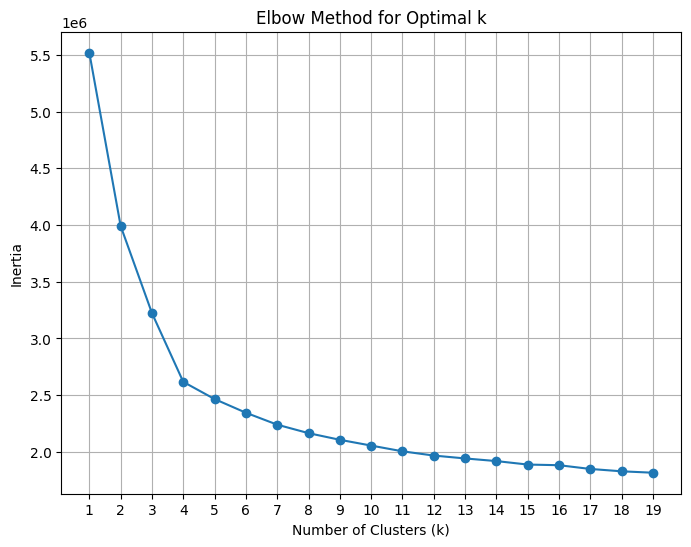

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Combine the DR and Normal features for the Elbow Method
all_train_features = np.concatenate((dr_features, normal_features), axis=0)

# Determine the range of k values to test
k_range = range(1, 20) # Testing k from 1 to 10

# Calculate inertia for each k
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(all_train_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = 4

# Apply K-Means to DR features
kmeans_dr = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init to 10 to suppress the warning
kmeans_dr.fit(new_dr_features)
dr_clusters = kmeans_dr.labels_

print("K-Means clustering applied to DR features.")
print(f"DR cluster assignments: {dr_clusters}")


# Apply K-Means to Normal features
kmeans_normal = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init to 10 to suppress the warning
kmeans_normal.fit(new_normal_features)
normal_clusters = kmeans_normal.labels_

print("\nK-Means clustering applied to Normal features.")
print(f"Normal cluster assignments: {normal_clusters}")

# You can also visualize the clusters if the features are reduced to 2 or 3 dimensions
# For example, using PCA or t-SNE before clustering and visualization.
# Since the features are high-dimensional (32768), direct visualization is not straightforward.

K-Means clustering applied to DR features.
DR cluster assignments: [2 2 3 ... 2 2 3]

K-Means clustering applied to Normal features.
Normal cluster assignments: [0 3 3 ... 3 1 0]


In [17]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

# Function to calculate maximum distance within each cluster
def calculate_max_distance_per_cluster(features, clusters):
    max_distances = {}
    for cluster_id in np.unique(clusters):
        # Get features belonging to the current cluster
        cluster_features = features[clusters == cluster_id]

        if cluster_features.shape[0] > 1: # Need at least two points to calculate distance
            # Calculate pairwise distances within the cluster
            pairwise_distances = pdist(cluster_features)

            # Find the maximum distance
            max_distance = np.max(pairwise_distances)
            max_distances[cluster_id] = max_distance
        else:
            max_distances[cluster_id] = 0 # Max distance is 0 for a cluster with only one point

    return max_distances

# Calculate maximum distances for DR clusters
dr_max_distances = calculate_max_distance_per_cluster(dr_features, dr_clusters)
print("Maximum distance within each DR cluster:")
for cluster_id, max_dist in dr_max_distances.items():
    print(f"  Cluster {cluster_id}: {max_dist}")

# Calculate maximum distances for Normal clusters
normal_max_distances = calculate_max_distance_per_cluster(normal_features, normal_clusters)
print("\nMaximum distance within each Normal cluster:")
for cluster_id, max_dist in normal_max_distances.items():
    print(f"  Cluster {cluster_id}: {max_dist}")

Maximum distance within each DR cluster:
  Cluster 0: 57.17948375563815
  Cluster 1: 81.66642177082542
  Cluster 2: 69.90438536943098
  Cluster 3: 82.23747168714367

Maximum distance within each Normal cluster:
  Cluster 0: 80.69080502217355
  Cluster 1: 73.01033939802086
  Cluster 2: 87.23301920132629
  Cluster 3: 66.53168817781636


In [18]:
from scipy.spatial.distance import cdist

# Get the cluster centers
dr_cluster_centers = kmeans_dr.cluster_centers_
normal_cluster_centers = kmeans_normal.cluster_centers_

# Create a list to store predicted labels for test features
predicted_labels = []

# Iterate through each test feature
for test_feature in new_test_features:
    # Calculate distances to each DR cluster center
    distances_to_dr_clusters = cdist([test_feature], dr_cluster_centers)[0]

    # Calculate distances to each Normal cluster center
    distances_to_normal_clusters = cdist([test_feature], normal_cluster_centers)[0]

    # Count how many DR clusters the test feature is within the maximum distance of
    dr_cluster_votes = 0
    for i in range(len(dr_cluster_centers)):
        if distances_to_dr_clusters[i] <= dr_max_distances[i]:
            dr_cluster_votes += 1

    # Count how many Normal clusters the test feature is within the maximum distance of
    normal_cluster_votes = 0
    for i in range(len(normal_cluster_centers)):
        if distances_to_normal_clusters[i] <= normal_max_distances[i]:
            normal_cluster_votes += 1

    # Predict the class based on the majority of votes
    if dr_cluster_votes > normal_cluster_votes:
        predicted_labels.append(class_names[0]) # 'dr'
    elif normal_cluster_votes > dr_cluster_votes:
        predicted_labels.append(class_names[1]) # 'normal'
    else:
        # In case of a tie, you might have a strategy like assigning to the closest cluster overall,
        # or a random assignment, or further analysis. For simplicity, let's assign to the class with the smaller total distance to its centers.
        if np.min(distances_to_dr_clusters) < np.min(distances_to_normal_clusters):
             predicted_labels.append(class_names[0]) # 'dr'
        else:
             predicted_labels.append(class_names[1]) # 'normal'


# Convert predicted labels to numpy array
predicted_labels = np.array(predicted_labels)

print(f"Predicted labels shape: {predicted_labels.shape}")
# print(f"Predicted labels: {predicted_labels}") # Uncomment to see all predicted labels

Predicted labels shape: (361,)


In [19]:
from sklearn.metrics import classification_report

# Convert the true labels to class names for comparison
true_labels_class_names = [class_names[label] for label in test_labels]

# Generate the classification report
report = classification_report(true_labels_class_names, predicted_labels)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          dr       0.79      0.90      0.84       182
      normal       0.88      0.75      0.81       179

    accuracy                           0.83       361
   macro avg       0.84      0.83      0.83       361
weighted avg       0.84      0.83      0.83       361



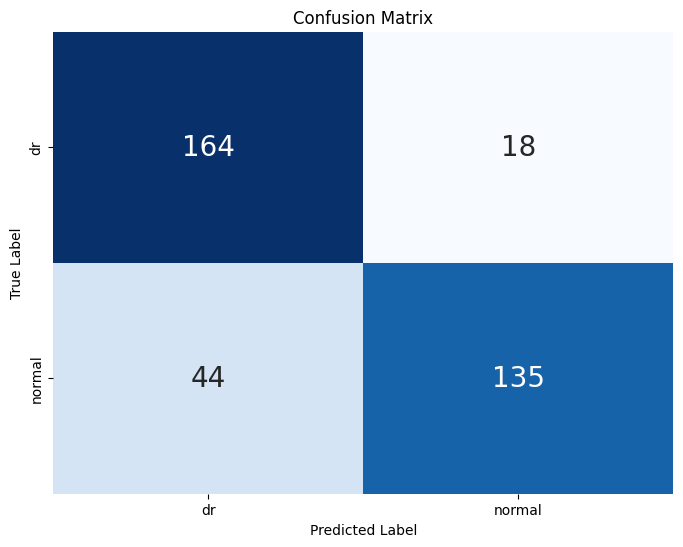

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels_class_names, predicted_labels, labels=class_names)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names, # Corrected typo here
    annot_kws={'size': 20}, # Increase font size of annotations
    cbar=False # Remove the color bar
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

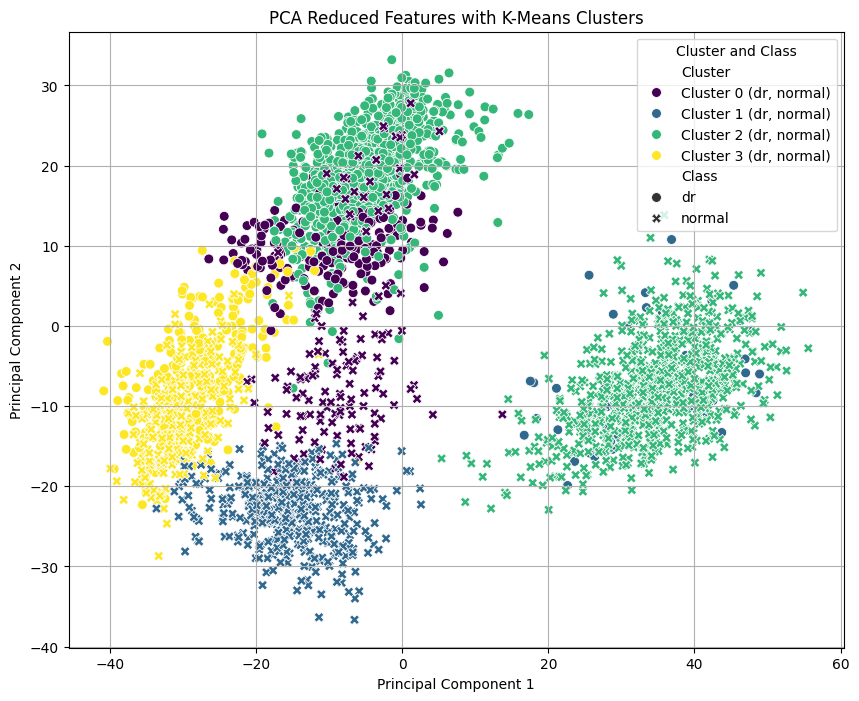

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine reduced features and their corresponding cluster assignments and original class labels
all_reduced_features = np.concatenate((reduced_dr_features, reduced_normal_features), axis=0)
all_cluster_assignments = np.concatenate((dr_clusters, normal_clusters), axis=0)
all_original_labels = np.concatenate((np.full(reduced_dr_features.shape[0], class_names[0]),
                                      np.full(reduced_normal_features.shape[0], class_names[1])), axis=0)

# Create a DataFrame for easier plotting with Seaborn
import pandas as pd
plot_data = pd.DataFrame({
    'PCA Component 1': all_reduced_features[:, 0],
    'PCA Component 2': all_reduced_features[:, 1],
    'Cluster': all_cluster_assignments,
    'Class': all_original_labels
})

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x='PCA Component 1',
    y='PCA Component 2',
    hue='Cluster',  # Color by cluster ID
    style='Class',  # Use different markers for 'dr' and 'normal' classes
    data=plot_data,
    palette='viridis', # Choose a color palette
    s=50 # Marker size
)

# Create a custom legend that shows both class and cluster
handles, labels = scatter.get_legend_handles_labels()
# Recreate labels to include both class and cluster
new_labels = []
for i, label in enumerate(labels):
    if label.isdigit(): # This is a cluster label
        cluster_id = int(label)
        # Find classes associated with this cluster (could be mixed if clustering wasn't perfect separation)
        classes_in_cluster = plot_data[plot_data['Cluster'] == cluster_id]['Class'].unique()
        class_info = ", ".join(classes_in_cluster)
        new_labels.append(f"Cluster {cluster_id} ({class_info})")
    else: # This is a class label for the style legend
        new_labels.append(label)

# Add a title and show the plot
plt.title('PCA Reduced Features with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles, new_labels, title='Cluster and Class')
plt.grid(True)
plt.show()